In [3]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time

# Resolução do Ítem (c)



### Evolução Diferencial

In [2]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Trid', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100


Para a minimização da função Trid, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:
    * Número de Gerações: 100
    * Tamanho da População: 100
    * Taxa de Cruzamento: 0.9
    * Fator de Escala: 0.8
O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.

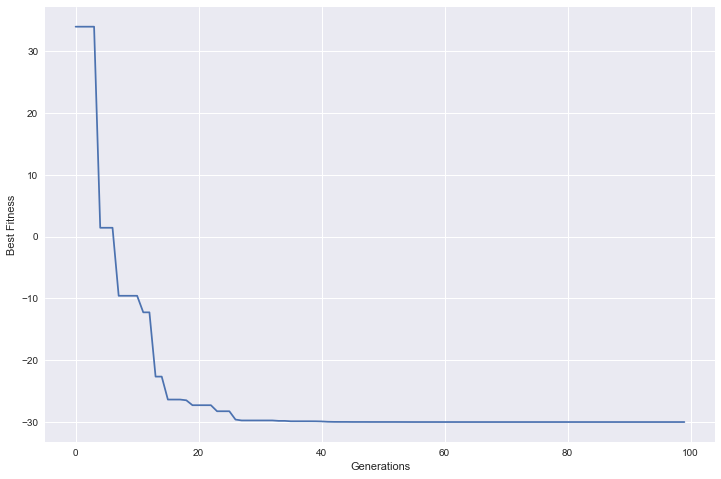

In [3]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima após a vigésima geração.


In [4]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: -29.999999568959254	Q1: -29.99991794987318	Q2: -29.99018350411515	Q3: -28.254125914960923	Max: -29.999994078037247
-24.838464302044567



Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre -29.999 e -28.254, o que destaca que, em sua maioria, as soluções candidatas estavam próximas da solução ótima.

A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [5]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=100,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Trid', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 100

In [6]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -29.999999119786665
Variance: 2.8279631448935454e-13
Standard Deviation: 5.317859668037081e-07


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de -29.99 e o desvio padrão 5.31.

In [7]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 3.188835120201111
Variance: 0.18404917740118423
Standard Deviation: 0.42900953066474434


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 3.18 e desvio padrão de 0.429.

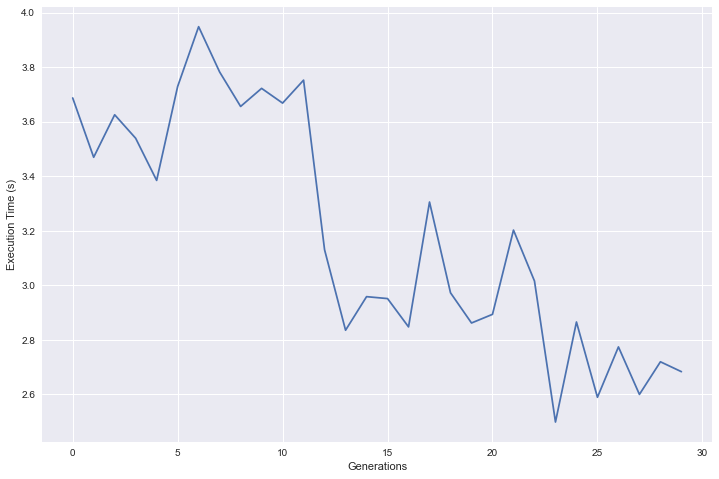

In [8]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.92 e desvio padrão de 0.1677.

### Algorítmos de Estimação de Distribuição

In [12]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Trid'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função Trid, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    * Número de Gerações: 100
    * Tamanho da População: 50
    * Probabilidade Mínima: 0.04
    * Probabilidade Máxima: 0.93
    * Taxa de Aprendizado: 0.03
    

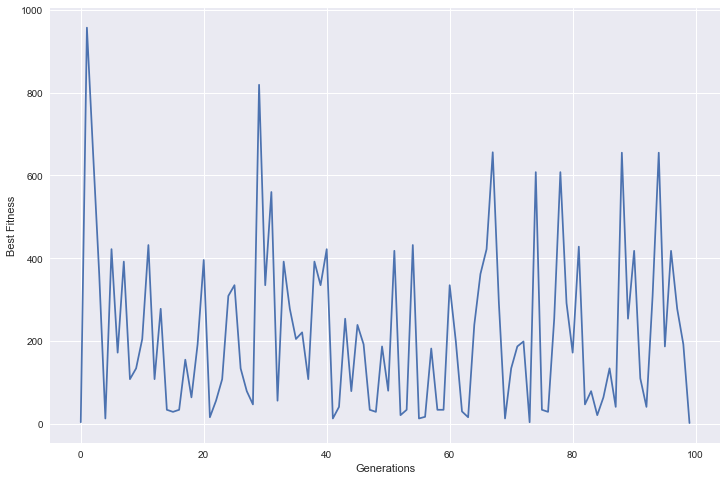

In [13]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [14]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 3.98	Q1: 41.0	Q2: 187.0	Q3: 335.0	Max: 20.6
221.05


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 41.0 e 335.0. 

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [15]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=20, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Trid'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [16]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -1.6
Variance: 88.77333333333334
Standard Deviation: 9.421960164070603


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de -1.6 e o desvio padrão 9.421.

In [17]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.1821346839269
Variance: 0.05970475952880816
Standard Deviation: 0.24434557399062534


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 2.18 e desvio padrão de 0.244.

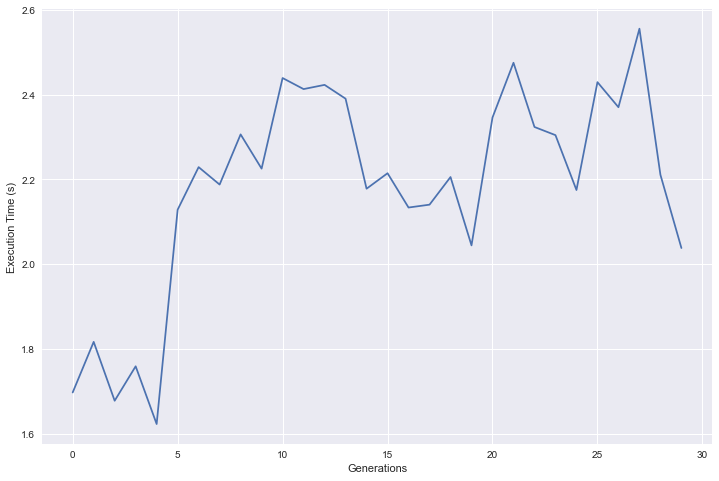

In [18]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1%. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 2000 gerações.

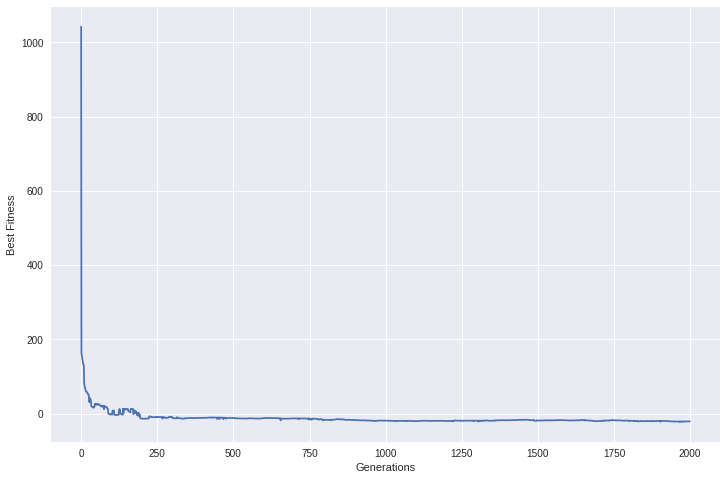

In [ ]:
UB = 32
LB = -32
GENERATIONS = 2000
pop = np.random.uniform(low=LB, high=UB, size=(400,5))
model = ModelGA(
    pop,
    Trid().compute, 
    "whole arithmetic recombination", 
    "uniform mutation",
    "fitness proportional selection",
    "fitness proportional selection",
    0.01,
    GENERATIONS,
    UB,
    LB,
    0,
    alpha=0.99)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-28,5" com um desvio padrão de "1,02". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 31 s.

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -28.497466475272226
Variance: 1.0315777009490064
Standard Deviation: 1.0156661365571888


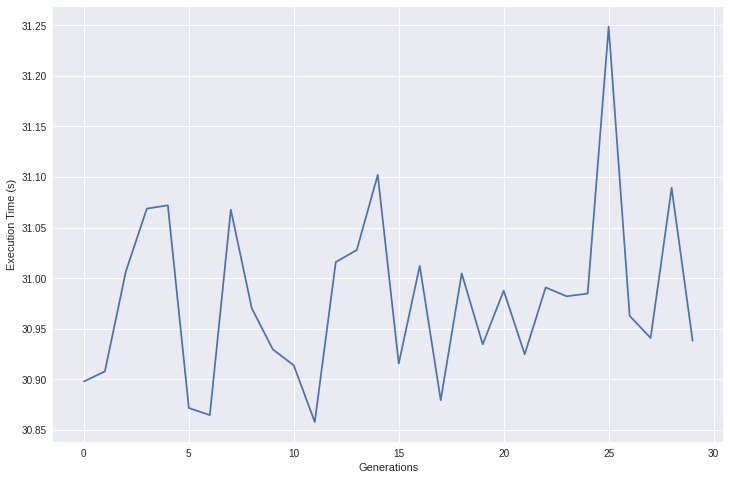

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.

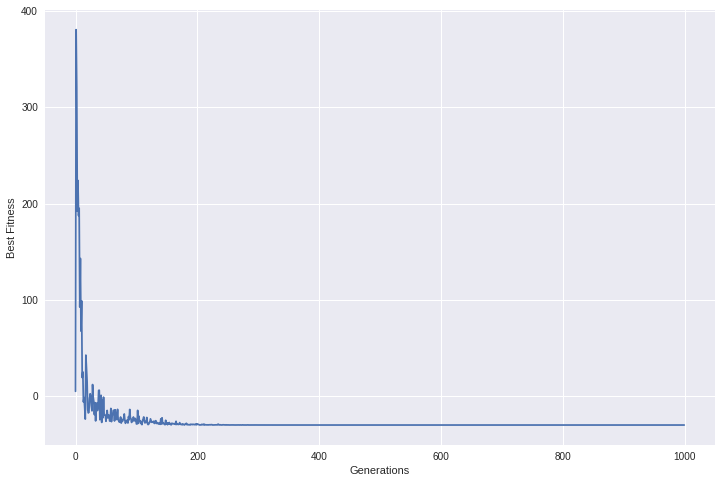

In [ ]:
GENERATIONS = 1000
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,5))
model = ModelES(
    pop,
    Trid().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    1000,
    UB,
    LB,
    0)
    
    
es_alg = ES(model)
es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-30" com um desvio padrão de "1,58e-14". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 4,41 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -30.000000000000046
Variance: 2.4822823150954506e-28
Standard Deviation: 1.5755260439280116e-14


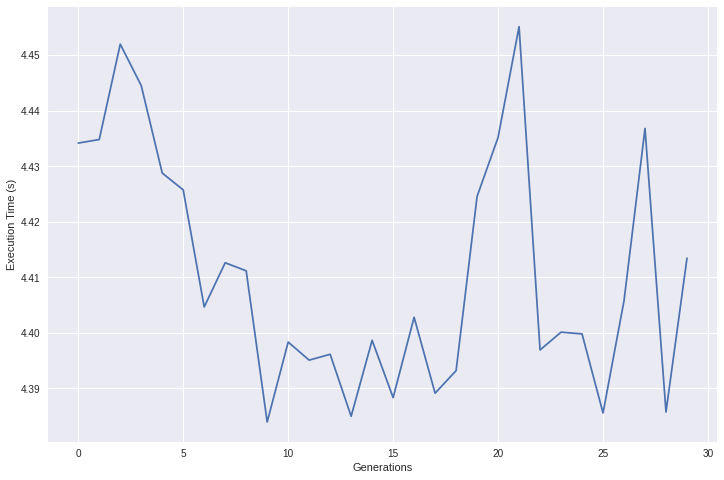

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()